<a href="https://colab.research.google.com/github/agus2207/ESCOM/blob/master/Analisis_de_imagenes/IA_P2_2016630128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT1w0hKLRBfUWki17i13oJcYhpwHa2tEon1oZagn7lYdogzehai&usqp=CAU" width="100" height="100" align="left" alt="IPN"/>
<img src="https://img1.freepng.es/20180531/hyf/kisspng-escom-instituto-politcnico-nacional-escuela-supe-lemon-grass-5b0fbe5636a625.6618946915277584222239.jpg" width="100" height="100" align="right" alt="Escom"/>
<h1><center><b>Análisis de Imagenes</b></center></h1>
<h1><center><b>Practice 2: Operations with images</b></center></h1>

---

- **`Nombre:`** Galindo Reyes Agustin
- **`Grupo`**: 3CV6.
- **`Materia`**: Análisis de Imágenes.
- **`Profesor`**: Flavio Arturo Sanchez Garfias.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Image_analisis/Practica2/Images

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Image_analisis/Practica2/Images
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Image_analisis/Practica2/Images


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [ ]:
#Displays an array as an image
def im_show(pic,ip):
    height=pic.shape[0]
    width=pic.shape[1]
    
    print(type(pic))
    channels=1
    if pic.ndim>2:
        channels=3
    #ip="nearest"
    plt.figure(figsize=(10,int(10*float(height)/float(width)) ))
    if channels==1:
        plt.imshow(pic,cmap='gray',interpolation=ip,aspect="auto")
    else:
        plt.imshow(pic,interpolation=ip,aspect="auto")

def im_load(file):
    pic=Image.open(file) #Open the image
    print("Image type:"+str(type(pic))) #Displays the type of image (JPEG, BMP, PNG, GIF, etc)
    pic_arr = np.asarray(pic) #converts the image to an Numpy Array
    print("Dimentions"+str(pic_arr.shape)) #(height,width,#of channels)
    pic_channels=1
    if pic_arr.ndim>2:
        pic_channels=3
    print("Channels:"+str(pic_channels))
    #im_show(pic_arr)
    return pic_arr

def grayscale(pic):
    height=pic.shape[0]
    width=pic.shape[1]
    
    channels=1
    if pic.ndim==3:
        channels=pic.shape[2]
    
    if channels==1:
        return pic

    factor=np.array([0.24,0.65,0.11])
    if channels==4:
        factor=np.array([0.24,0.65,0.11,1])

    pic2=np.dot(pic.astype(dtype=np.float),factor)

    return pic2.astype(dtype=np.uint8)

def noise(img, salt, pepper):
    height=img.shape[0]
    width=img.shape[1]  
    img_r=np.asarray(img.copy(),order="C")
    
    hw=height*width
    
    if salt>0 and salt<=1:
        npixels=int(float(hw)*salt)
        for i in range(npixels):
            x = np.random.randint(0,width,1)
            y = np.random.randint(0,height,1)
            img_r[y[0],x[0]]=255
            
        
    if pepper>0 and pepper<=1:
        npixels=int(float(hw)*pepper)
        for i in range(npixels):
            x = np.random.randint(0,width,1)
            y = np.random.randint(0,height,1)
            img_r[y[0],x[0]]=0
    
    return img_r

# **Python**
This seccion is to define the operation we are going to use without cython:
1. Add two images
2. Substract two images
3. Multiplication by a scalar
4. Negative of an image
5. The convolution of two images



In [ ]:
def valid_pixel(pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def suma_imagenes(arr_pic1, arr_pic2):
    if (arr_pic1.ndim == arr_pic2.ndim):
        height1=arr_pic1.shape[0]
        width1=arr_pic1.shape[1]
        height2=arr_pic2.shape[0]
        width2=arr_pic2.shape[1]
        if(height1 == height2) & (width1 == width2):
            resultado = arr_pic1.copy() 
            if(arr_pic1.ndim == 2):
                #resultado = np.zeros((height1, width1), dtype = np.int8)
                for i in range(height1):
                    for j in range(width1):
                        pixel = float(arr_pic1[i,j])+float(arr_pic2[i,j])
                        resultado[i,j] = int(valid_pixel(pixel))
            elif(arr_pic1.ndim == 3):
                chanel = arr_pic1.shape[2]
                #resultado = np.zeros((height1, width1,chanel), dtype = np.int8)
                for chanel in range(chanel):
                    for i in range(height1):
                        for j in range(width1):
                            pixel = float(arr_pic1[i,j,chanel])+float(arr_pic2[i,j,chanel])
                            resultado[i,j,chanel] = valid_pixel(pixel)
            return resultado

def resta_imagenes(arr_pic1, arr_pic2):
    if (arr_pic1.ndim == arr_pic2.ndim):
        height1=arr_pic1.shape[0]
        width1=arr_pic1.shape[1]
        height2=arr_pic2.shape[0]
        width2=arr_pic2.shape[1]
        if(height1 == height2) & (width1 == width2):
            resultado = arr_pic1.copy() 
            if(arr_pic1.ndim == 2):
                #resultado = np.zeros((height1, width1), dtype = np.int8)
                for i in range(height1):
                    for j in range(width1):
                        pixel = float(arr_pic1[i,j])-float(arr_pic2[i,j])
                        resultado[i,j] = int(valid_pixel(pixel))
            elif(arr_pic1.ndim == 3):
                chanel = arr_pic1.shape[2]
                #resultado = np.zeros((height1, width1,chanel), dtype = np.int8)
                for c in range(chanel):
                    for i in range(height1):
                        for j in range(width1):
                            pixel = float(arr_pic1[i,j,c])-float(arr_pic2[i,j,c])
                            resultado[i,j,c] = int(valid_pixel(pixel))
            return resultado

def multiplicacion(arr_pic, alpha):
    multiplica = arr_pic.copy()
    height = arr_pic.shape[0]
    width = arr_pic.shape[1]
    if(arr_pic.ndim == 2):
        for i in range(height):
            for j in range(width):
                pixel = float(arr_pic[i,j])*float(alpha)
                multiplica[i,j] = int(valid_pixel(pixel))
    elif(arr_pic.ndim == 3):
        for i in range(height):
            for j in range(width):
                for c in range(arr_pic.shape[2]):
                    pixel = float(arr_pic[i,j,c])*float(alpha)
                    multiplica[i,j,c] = int(valid_pixel(pixel))
    return multiplica

def pixel_negativo(pixel):
    limite_superior = 255.0
    limite_inferior = 0.0
    if(pixel == limite_superior):
        pixel = float(limite_inferior)
    elif(pixel == limite_inferior):
        pixel = float(limite_superior)
    else:
        pixel = float(limite_superior-pixel)
    return pixel

def negativo(arr_pic):
    negative_pic = arr_pic.copy()
    height=negative_pic.shape[0]
    width=negative_pic.shape[1]
    if(negative_pic.ndim == 2):
        for i in range(height):
            for j in range(width):
                pixel = pixel_negativo(float(arr_pic[i,j]))
                negative_pic[i,j] = int(valid_pixel(pixel))
    elif(negative_pic.ndim == 3):
        chanel = negative_pic.shape[2]
        for c in range(chanel):
            for i in range(height):
                for j in range(width):
                    pixel = pixel_negativo(float(arr_pic[i,j,c]))
                    negative_pic[i,j,c] = int(valid_pixel(pixel))
    return negative_pic

def kernel_espejo(kernel):
    new_kernel = np.rot90(kernel, 2)
    return new_kernel

def convolusion(arr_pic, kernel):
    fx = arr_pic.copy()
    h = fx.shape[0]
    w = fx.shape[1]
    k_h = kernel.shape[0]
    k_w = kernel.shape[1]
    for i in range(h):
        for j in range(w):
            if (arr_pic.ndim == 2):
                suma = 0.0
                for k in range(k_h):
                    for l in range(k_w):
                        try:
                            if (i<h) | (j<w):
                                res = float(arr_pic[(i-1)+k, (j-1)+l])*kernel[k,l]
                                suma = suma+res
                        except IndexError:
                            suma = suma+0.0
                        fx[i,j] = int(valid_pixel(suma))
            else:
                for c in range(arr_pic.shape[2]):
                    suma = 0.0
                    for k in range(k_h):
                        for l in range(k_w):
                            try:
                                if (i<h) | (j<w):
                                    res = float(arr_pic[(i-1)+k, (j-1)+l,c])*kernel[k,l]
                                    suma = suma+res
                            except IndexError:
                                suma = suma+0.0
                            fx[i,j,c] = int(valid_pixel(suma))
    return fx

# **Inputs**
This are the images we are going to use to do the operations

Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(3000, 4000, 3)
Channels:3
<class 'numpy.ndarray'>
Image type:<class 'PIL.JpegImagePlugin.JpegImageFile'>
Dimentions(3000, 4000, 3)
Channels:3
<class 'numpy.ndarray'>


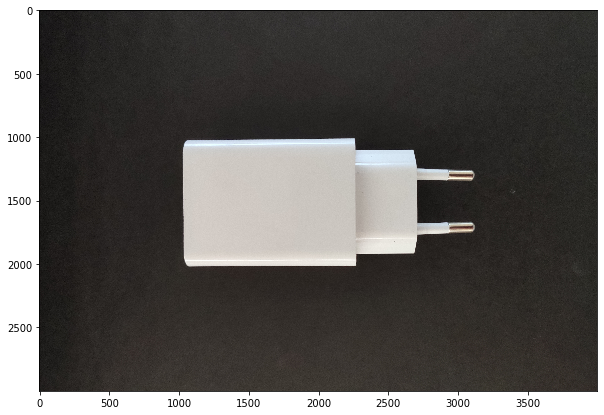

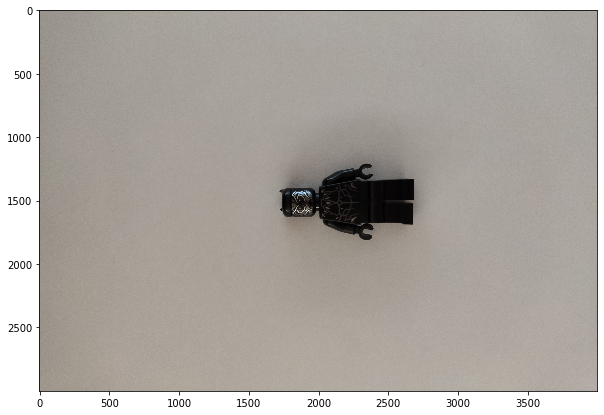

In [ ]:
  ruta = "./"
nombre1 = "Imagen2.jpg"
nombre2 = "Imagen1.jpg"
arr_pic1 = im_load(ruta+nombre1)
im_show(arr_pic1,"nearest")
arr_pic2 = im_load(ruta+nombre2)
im_show(arr_pic2,"nearest")

# **Addition**
We can add to matrix if they have the same height and the same width, because we adding pixel by pixel for each matrix

<class 'numpy.ndarray'>


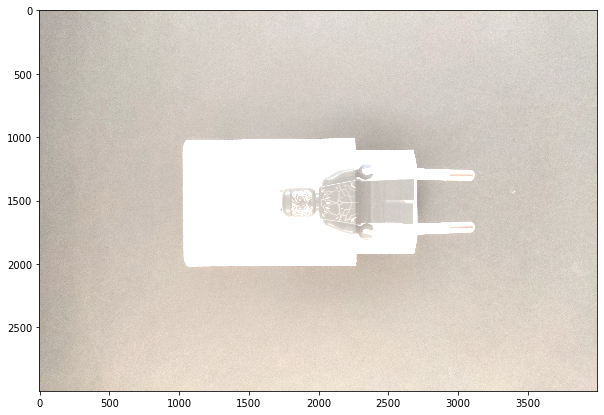

In [ ]:
suma = suma_imagenes(arr_pic1, arr_pic2)
im_show(suma,"nearest")

# **Substraction**
Same rule for the substraction we should have matrix with same heigth and width

<class 'numpy.ndarray'>


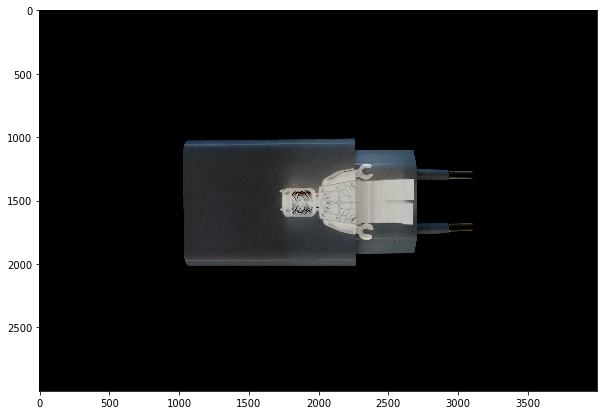

In [ ]:
resta = resta_imagenes(arr_pic1, arr_pic2)
im_show(resta,"nearest")

# **Multiplication by a scalar**
This operation consist in multiply every value of the matrix with the scalar given.


<class 'numpy.ndarray'>


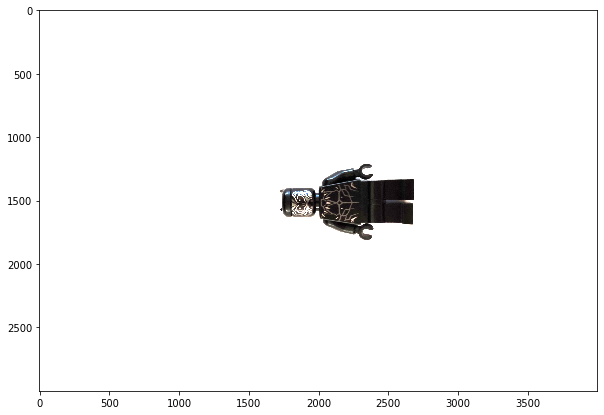

In [ ]:
multiplica = multiplicacion(arr_pic2, 3)
im_show(multiplica,"nearest")

# **Negative**
This operation consist in subtract for the superior limit in this case 255 the value of the actual pixel. This operation is for every pixel in the image 

<class 'numpy.ndarray'>


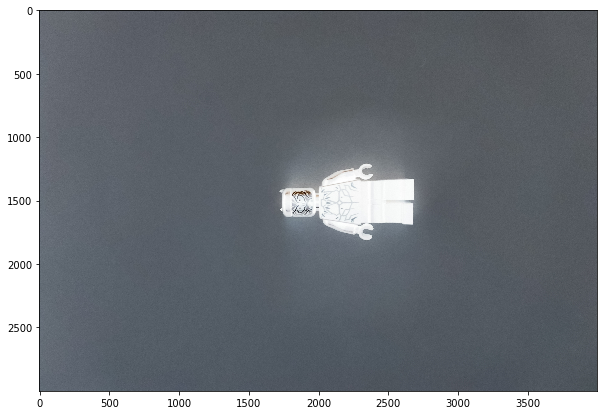

In [ ]:
neg = negativo(arr_pic2)
im_show(neg,"nearest")

# **Convolution**
This operation 

<class 'numpy.ndarray'>


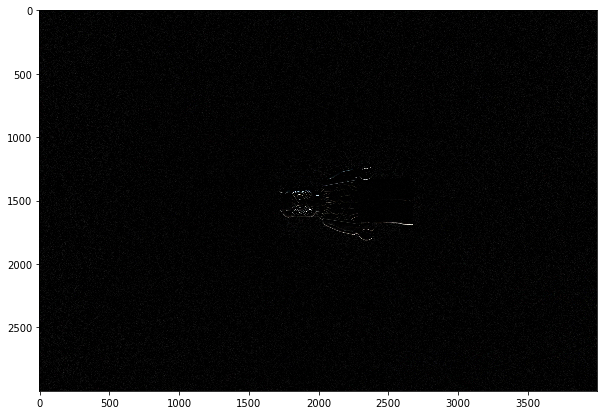

In [ ]:
kernel = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
new_k = np.asanyarray(kernel_espejo(kernel))
con = convolusion(arr_pic2, new_k)
im_show(con,"nearest")

# **Cython addition**

In [ ]:
%%cython -a
import numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_suma_gray(const unsigned char[:,:] img1, const unsigned char[:,:] img2):
    cdef int height1 = img1.shape[0]
    cdef int height2 = img2.shape[0]
    cdef int width1 = img1.shape[1]
    cdef int width2 = img2.shape[1]
    cdef int i,j
    cdef resultado = img1.copy()
    if(height1 == height2) & (width1 == width2):
        for i in range(height1):
            for j in range(width1):
                pixel = float(img1[i,j])+float(img2[i,j])
                resultado[i,j] = int(cython_valid_pixel(pixel))
    return resultado

def cython_suma_rgb(const unsigned char[:,:,:] img1, const unsigned char[:,:,:] img2):
    cdef int height1 = img1.shape[0]
    cdef int height2 = img2.shape[0]
    cdef int width1 = img1.shape[1]
    cdef int width2 = img2.shape[1]
    cdef int chanel = img1.shape[2]
    cdef int i,j,c
    cdef resultado = img1.copy()
    if(height1 == height2) & (width1 == width2):
        for i in range(height1):
            for j in range(width1):
                for c in range(chanel):
                    pixel = float(img1[i,j,c])+float(img2[i,j,c])
                    resultado[i,j,c] = int(cython_valid_pixel(pixel))
    return resultado



<class '_cython_magic_475d4de6a6b1360eac9db2019e1ccad4._memoryviewslice'>


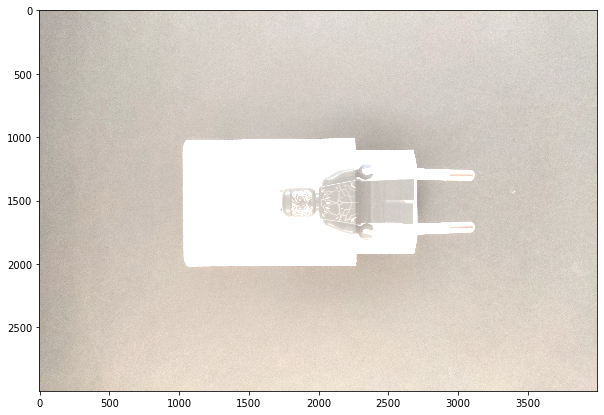

In [ ]:
dim = arr_pic1.ndim
if(dim == 2):
    suma_cython = cython_suma_gray(arr_pic1,arr_pic2)
elif(dim == 3):
    suma_cython = cython_suma_rgb(arr_pic1,arr_pic2)
im_show(suma_cython,"nearest")

# **Cython Subtraction**

In [ ]:
%%cython -a
import numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_resta_gray(const unsigned char[:,:] img1, const unsigned char[:,:] img2):
    cdef int height1 = img1.shape[0]
    cdef int height2 = img2.shape[0]
    cdef int width1 = img1.shape[1]
    cdef int width2 = img2.shape[1]
    cdef int i,j
    cdef resultado = img1.copy()
    if(height1 == height2) & (width1 == width2):
        for i in range(height1):
            for j in range(width1):
                pixel = float(img1[i,j])-float(img2[i,j])
                resultado[i,j] = int(cython_valid_pixel(pixel))
    return resultado

def cython_resta_rgb(const unsigned char[:,:,:] img1, const unsigned char[:,:,:] img2):
    cdef int height1 = img1.shape[0]
    cdef int height2 = img2.shape[0]
    cdef int width1 = img1.shape[1]
    cdef int width2 = img2.shape[1]
    cdef int chanel = img1.shape[2]
    cdef int i,j,c
    cdef resultado = img1.copy()
    if(height1 == height2) & (width1 == width2):
        for i in range(height1):
            for j in range(width1):
                for c in range(chanel):
                    pixel = float(img1[i,j,c])-float(img2[i,j,c])
                    resultado[i,j,c] = int(cython_valid_pixel(pixel))
    return resultado

<class '_cython_magic_d2478680eca65dcbf48fbcff8cd5aa60._memoryviewslice'>


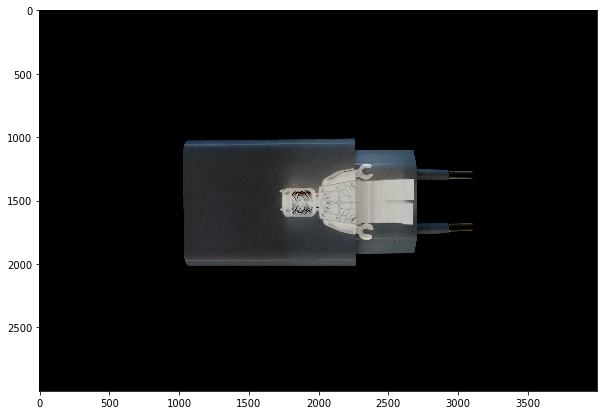

In [ ]:
dim = arr_pic1.ndim
if(dim == 2):
    resta_cython = cython_resta_gray(arr_pic1,arr_pic2)
elif(dim == 3):
    resta_cython = cython_resta_rgb(arr_pic1,arr_pic2)
im_show(resta_cython,"nearest")

# **Cython Multiplication by a scalar**

In [ ]:
%%cython -a
import numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_multiplicaion_gray(const unsigned char[:,:] img1, const float alpha):
    cdef int i,j
    cdef int heigth = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef resultado = img1.copy()
    for i in range(heigth):
        for j in range(width):
            pixel = float(img1[i,j])*alpha
            resultado[i,j] = int(cython_valid_pixel(pixel))
    return resultado

def cython_multiplicaion_rgb(const unsigned char[:,:,:] img1, const float alpha):
    cdef int i,j,c
    cdef int heigth = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int chanel = img1.shape[2]
    cdef resultado = img1.copy()
    for i in range(heigth):
        for j in range(width):
            for c in range(chanel):
                pixel = float(img1[i,j,c])*alpha
                resultado[i,j,c] = int(cython_valid_pixel(pixel))
    return resultado



<class '_cython_magic_eff90adbeefd219e93bac840208a9bf9._memoryviewslice'>


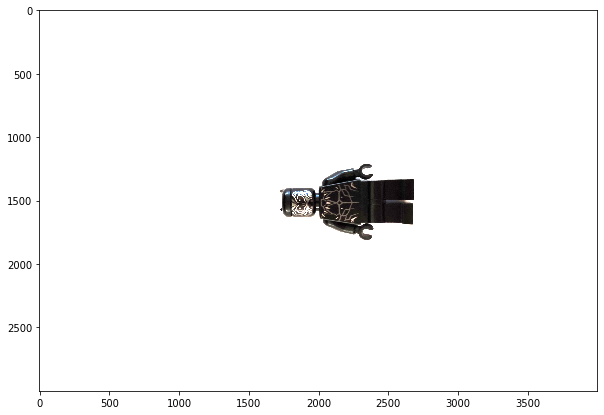

In [ ]:
dim = arr_pic2.ndim
if(dim == 2):
    multiplicacion_cython = cython_multiplicaion_gray(arr_pic2,3)
elif(dim == 3):
    multiplicacion_cython = cython_multiplicaion_rgb(arr_pic2,3)
im_show(multiplicacion_cython,"nearest")

# **Cython Negative**

In [ ]:
%%cython -a
import numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_pixel_negativo(const float pixel):
    cdef float limite_superior = 255.0
    cdef float limite_inferior = 0.0
    if(pixel == limite_superior):
        pixel = float(limite_inferior)
    elif(pixel == limite_inferior):
        pixel = float(limite_superior)
    else:
        pixel = float(limite_superior-pixel)
    return pixel

def cython_negativo_gray(const unsigned char[:,:] img1):
    cdef negative_pic = img1.copy()
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int i,j
    for i in range(height):
        for j in range(width):
            pixel = cython_pixel_negativo(float(img1[i,j]))
            negative_pic[i,j] = int(cython_valid_pixel(pixel))
    return negative_pic

def cython_negativo_rgb(const unsigned char[:,:,:] img1):
    cdef negative_pic = img1.copy()
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int chanel = img1.shape[2]
    cdef int i,j,c
    for i in range(height):
        for j in range(width):
            for c in range(chanel):
                pixel = cython_pixel_negativo(float(img1[i,j,c]))
                negative_pic[i,j,c] = int(cython_valid_pixel(pixel))
    return negative_pic


<class '_cython_magic_189127c2d50c7bbaadd3360687fbc4f9._memoryviewslice'>


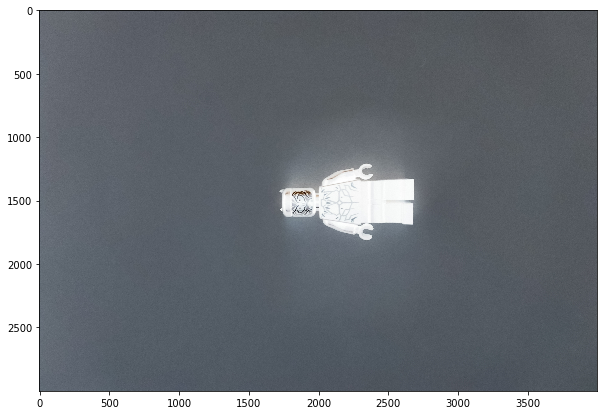

In [ ]:
dim = arr_pic2.ndim
if(dim == 2):
    negativo_cython = cython_negativo_gray(arr_pic2)
elif(dim == 3):
    negativo_cython = cython_negativo_rgb(arr_pic2)
im_show(negativo_cython,"nearest")

# **Cython Convolution**

In [ ]:
%%cython -a
import numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def cython_valid_pixel(const float pixel):
    if pixel < 0.0:
        pixel = 0.0
    elif pixel > 255.0:
        pixel = 255.0
    return pixel

def cython_kernel_espejo(long[:,:] kernel):
    cdef new_kernel = np.rot90(kernel,2)
    return new_kernel

def cython_convolusion_gray(const unsigned char[:,:] img1, long[:,:] kernel):
    cdef fx = img1.copy()
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int k_h = kernel.shape[0]
    cdef int k_w = kernel.shape[1]
    cdef int i,j
    for i in range(height):
        for j in range(width):
            suma = 0.0
            for k in range(k_h):
                for l in range(k_w):
                    try:
                        if (i<height) | (j<width):
                            res = float(img1[(i-1)+k, (j-1)+l])*kernel[k,l]
                            suma = suma + res 
                    except IndexError:
                        suma = suma+0.0
                    fx[i,j] = int(cython_valid_pixel(suma))
    return fx

def cython_convolusion_rgb(const unsigned char[:,:,:] img1, long[:,:] kernel):
    cdef fx = img1.copy()
    cdef int height = img1.shape[0]
    cdef int width = img1.shape[1]
    cdef int k_h = kernel.shape[0]
    cdef int k_w = kernel.shape[1]
    cdef int chanel = img1.shape[2]
    cdef int i,j,c
    for i in range(height):
        for j in range(width):
            for c in range(chanel):
                suma = 0.0
                for k in range(k_h):
                    for l in range(k_w):
                        try:
                            if (i<height) | (j<width):
                                res = float(img1[(i-1)+k, (j-1)+l,c])*kernel[k,l]
                                suma = suma + res 
                        except IndexError:
                            suma = suma+0.0
                        fx[i,j,c] = int(cython_valid_pixel(suma))
    return fx

<class '_cython_magic_4e6505d80353febdfd1d2ac85a246a66._memoryviewslice'>


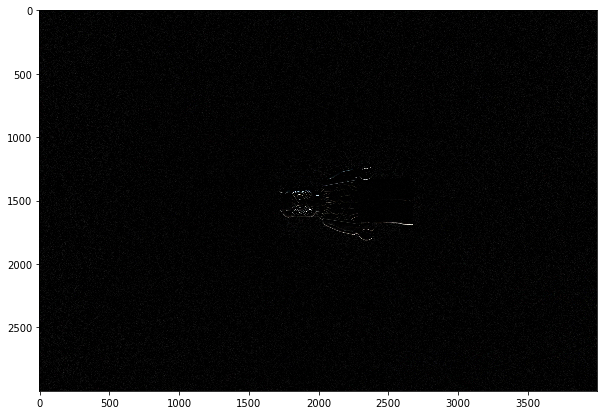

In [ ]:
kernel = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
new_k = cython_kernel_espejo(kernel)
dim = arr_pic2.ndim
if(dim == 2):
    convolusion_cython = cython_convolusion_gray(arr_pic2,new_k)
elif(dim == 3):
    convolusion_cython = cython_convolusion_rgb(arr_pic2,new_k)
im_show(convolusion_cython,"nearest")